In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from mlxtend.preprocessing import shuffle_arrays_unison
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
import time

In [55]:
data = pd.read_csv("GESTOS_17-04-2018.csv")
labels_data = pd.read_csv("CLASES_17-04-2018.csv")

X = data.fillna(data.mean(), inplace=True)
X = data.values
y = labels_data.values
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=17)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



# NAIVE BAYES

## Var_smoothing = 0.0001

In [56]:
estimator = GaussianNB(var_smoothing=0.0001)
start_time = time.clock()
estimator.fit(X_train,np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

--- 0.012208617177805081 seconds ---


# LEARNING CURVE

(50, 10)
(50, 10)
(50,)
(17999, 14)


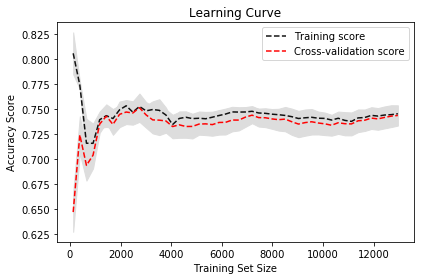

In [57]:


# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [58]:
predicted_labels = estimator.predict(X_test)
predicted_probas = estimator.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
log = log_loss(y_test, predicted_probas)
print(log)

0.745277777778
0.745277777778
0.694240529672
0.894449562833


## Var_smoothing = 1

In [59]:
estimator = GaussianNB(var_smoothing=1)
start_time = time.clock()
estimator.fit(X_train,np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

--- 0.008690982819587134 seconds ---


(50, 10)
(50, 10)
(50,)
(17999, 14)


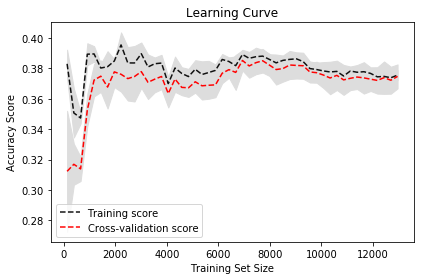

In [60]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [61]:
predicted_labels = estimator.predict(X_test)
predicted_probas = estimator.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
log = log_loss(y_test, predicted_probas)
print(log)

0.371388888889
0.371388888889
0.245016472056
1.67942170043


## Var_smoothing = 0.1

In [62]:
estimator = GaussianNB(var_smoothing=0.1)
start_time = time.clock()
estimator.fit(X_train,np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

--- 0.007806442402738867 seconds ---


(50, 10)
(50, 10)
(50,)
(17999, 14)


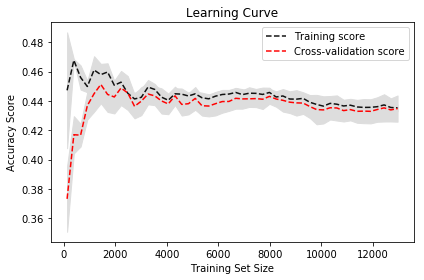

In [63]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [64]:
predicted_labels = estimator.predict(X_test)
predicted_probas = estimator.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
log = log_loss(y_test, predicted_probas)
print(log)

0.446388888889
0.446388888889
0.334785380484
1.46782039489


## Var_smoothing = 0.01

In [65]:
estimator = GaussianNB(var_smoothing=0.01)
start_time = time.clock()
estimator.fit(X_train,np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

--- 0.01006631253943624 seconds ---


(50, 10)
(50, 10)
(50,)
(17999, 14)


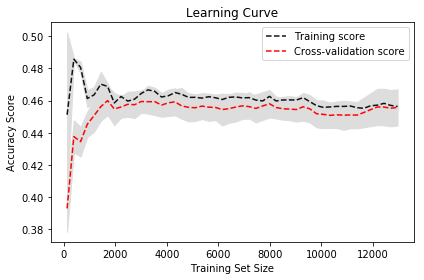

In [66]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [67]:
predicted_labels = estimator.predict(X_test)
predicted_probas = estimator.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
log = log_loss(y_test, predicted_probas)
print(log)

0.468333333333
0.468333333333
0.36127759313
1.40978830214


## Var_smoothing = 0.001

In [68]:
estimator = GaussianNB(var_smoothing=0.001)
start_time = time.clock()
estimator.fit(X_train,np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

--- 0.008304229652082995 seconds ---


(50, 10)
(50, 10)
(50,)
(17999, 14)


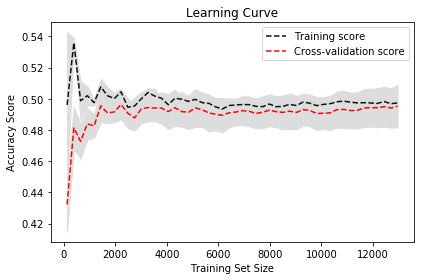

In [69]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [70]:
predicted_labels = estimator.predict(X_test)
predicted_probas = estimator.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
log = log_loss(y_test, predicted_probas)
print(log)

0.506388888889
0.506388888889
0.407027299343
1.33771514393


## Var_smoothing = 0.00001

In [71]:
estimator = GaussianNB(var_smoothing=0.00001)
start_time = time.clock()
estimator.fit(X_train,np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

--- 0.00885100252577331 seconds ---


(50, 10)
(50, 10)
(50,)
(17999, 14)


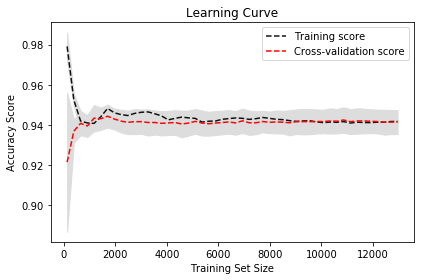

In [72]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [73]:
predicted_labels = estimator.predict(X_test)
predicted_probas = estimator.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
log = log_loss(y_test, predicted_probas)
print(log)

0.941388888889
0.941388888889
0.929663123772
0.209163357464


## Var_smoothing = 0.000001

In [74]:
estimator = GaussianNB(var_smoothing=0.000001)
#estimator = OneVsRestClassifier(GaussianNB(var_smoothing=0.0001))
start_time = time.clock()
estimator.fit(X_train,np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

--- 0.011378660742366264 seconds ---


(50, 10)
(50, 10)
(50,)
(17999, 14)


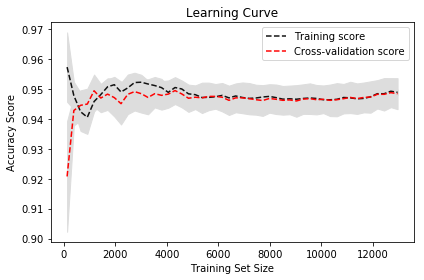

In [75]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [76]:
predicted_labels = estimator.predict(X_test)
predicted_probas = estimator.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
log = log_loss(y_test, predicted_probas)
print(log)

0.948611111111
0.948611111111
0.938321026094
0.328482335082


## Var_smoothing = 0.0000001

In [77]:
estimator = GaussianNB(var_smoothing=0.0000001)
start_time = time.clock()
estimator.fit(X_train,np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

--- 0.009151914218250568 seconds ---


(50, 10)
(50, 10)
(50,)
(17999, 14)


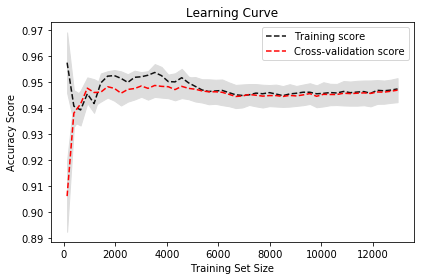

In [78]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [79]:
predicted_labels = estimator.predict(X_test)
predicted_probas = estimator.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
log = log_loss(y_test, predicted_probas)
print(log)

0.945277777778
0.945277777778
0.934330426847
0.495716737818


# ROC curve with best var_smoothing=0.000001

In [80]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Learn to predict each class against the other
#classifier = OneVsRestClassifier(GaussianNB(var_smoothing=0.001))
classifier = OneVsRestClassifier(GaussianNB(var_smoothing=0.000001))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


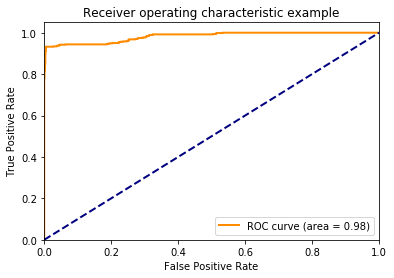

In [81]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

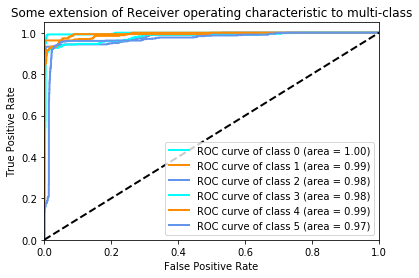

In [82]:

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()